In this lesson, we will apply K-Means Clustering and Gaussian Mixture Models (GMM) to segment mall customers based on their Age, Annual Income, and Spending Score. This unsupervised learning approach helps businesses tailor marketing strategies by identifying different customer groups, such as high-spending customers, budget-conscious shoppers, or infrequent visitors.

To effectively segment customers, we follow a structured process that ensures accurate cluster formation and meaningful insights. 

The key problem-solving approach in this lesson involves:

1. Defining the Problem: Understanding why segmentation is necessary for business applications.
2. Preparing the Data: Selecting relevant features and standardizing them for consistency.
3. Determining the Optimal Number of Clusters: Using the Elbow Method (for K-Means) and Bayesian Information Criterion (BIC) (for GMM) to find the best segmentation.
4. Applying Clustering Models: Running K-Means and GMM, assigning customers to clusters.
5. Visualizing & Interpreting Results: Using scatter plots, centroids, and boundary indicators (circles and ellipses) to analyze the clusters.

##### Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

c:\Users\marha\.conda\envs\ml\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


##### Step 2: Load and Preprocess Data

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Select numerical features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Step 3: Determine Optimal Cluster Number for K-Means Using the Elbow Method

In [3]:
# Find optimal K for K-Means (Elbow Method)
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

##### Step 4: Determine Optimal Component Number for GMM Using BIC

In [4]:
# Find optimal number of components for GMM using BIC
bic_scores = []
for n in range(2, 10):
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

##### Step 5: Plot Elbow Curve & BIC Score

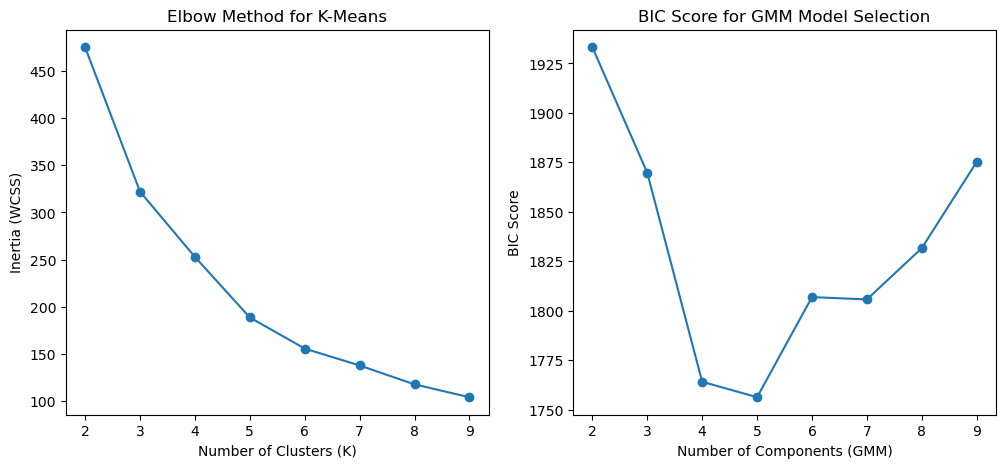

In [5]:
# 2 Plots in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Method Plot
axes[0].plot(K_range, inertia, marker='o')
axes[0].set_xlabel("Number of Clusters (K)")
axes[0].set_ylabel("Inertia (WCSS)")
axes[0].set_title("Elbow Method for K-Means")

# BIC Score Plot for GMM
axes[1].plot(range(2, 10), bic_scores, marker='o')
axes[1].set_xlabel("Number of Components (GMM)")
axes[1].set_ylabel("BIC Score")
axes[1].set_title("BIC Score for GMM Model Selection")

plt.show()

##### Step 6: Apply K-Means and GMM with Chosen Parameters

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

gmm = GaussianMixture(n_components=4, random_state=42, covariance_type='full')
gmm_labels = gmm.fit_predict(X_scaled)

##### Step 7: Define Helper Functions for Drawing Cluster Boundaries

In [7]:
# Function to draw circles around K-Means clusters
def draw_kmeans_circles(ax, kmeans, X_scaled, kmeans_labels):
    for i, center in enumerate(kmeans.cluster_centers_):
        cluster_points = X_scaled[kmeans_labels == i]
        std_dev = np.std(cluster_points, axis=0)
        circle = patches.Circle(center, std_dev[0] * 2, color='red', fill=False, 
                                linewidth=2, linestyle='dashed', alpha=0.7)
        ax.add_patch(circle)

# Function to draw ellipses for GMM clusters
def draw_gmm_ellipses(ax, gmm, X_scaled):
    for i in range(gmm.n_components):
        mean = gmm.means_[i]
        covariances = gmm.covariances_[i]

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariances)

        # Extract the angle of rotation
        largest_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
        angle = np.degrees(np.arctan2(largest_eigenvector[1], largest_eigenvector[0]))

        # Width and height of the ellipse (95% confidence interval)
        width = 2 * np.sqrt(eigenvalues[0])
        height = 2 * np.sqrt(eigenvalues[1])

        # Create and add the ellipse
        ellipse = patches.Ellipse(mean, width, height, angle=angle, edgecolor='blue',
                                  facecolor='none', linewidth=2, linestyle='dashed', alpha=0.7)
        ax.add_patch(ellipse)

##### Step 8: Scatter Plots for K-Means and GMM Results

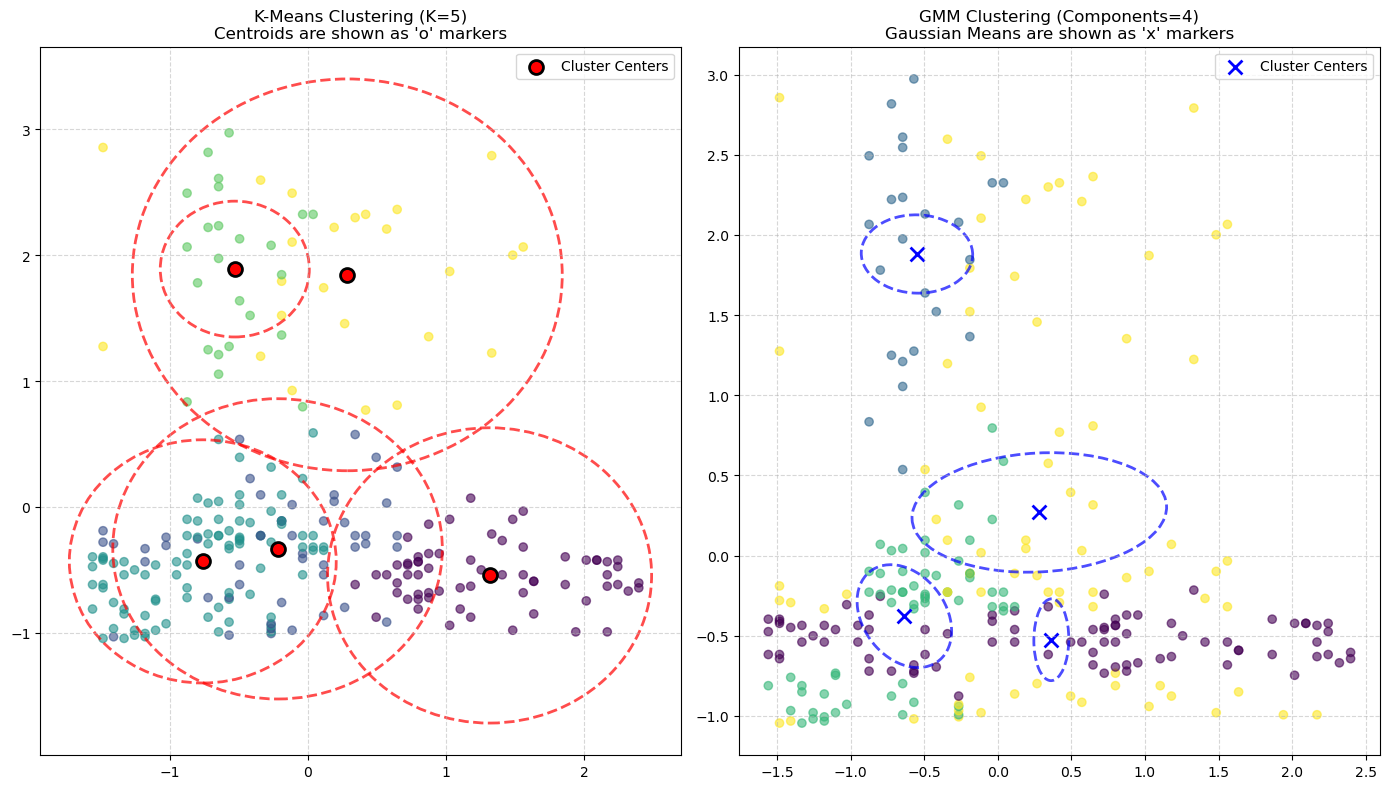

In [10]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # Adjust size for clarity

# K-Means Plot
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=100, c='red', marker='o', edgecolors='black', linewidth=2, label="Cluster Centers")
draw_kmeans_circles(axes[0], kmeans, X_scaled, kmeans_labels)
axes[0].set_title("K-Means Clustering (K=5)\nCentroids are shown as 'o' markers")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# GMM Plot
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', alpha=0.6)
axes[1].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
                s=100, c='blue', marker='x', linewidth=2, label="Cluster Centers")
draw_gmm_ellipses(axes[1], gmm, X_scaled)
axes[1].set_title("GMM Clustering (Components=4)\nGaussian Means are shown as 'x' markers")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

# Adjust layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()